In [89]:
import tensorflow as tf
import numpy as np
tf.enable_eager_execution()
tf.set_random_seed(777)  # for reproducibility
tf.executing_eagerly()

True

In [0]:
%config InlineBackend.figure_format='svg'

In [0]:
#Create the dataset for train and test,respectively
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()

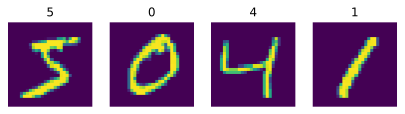

In [92]:
import matplotlib.pyplot as plt

fig,axes=plt.subplots(1,4,figsize=(7,3))
for img,label,ax in zip(x_train[:4],y_train[:4],axes):
  ax.set_title(label)
  ax.imshow(img)
  ax.axis('off')
plt.show()

In [93]:
#Let's find out whta is the structure of train and test data. 
print(f"train_image:{x_train.shape}")
print(f"train_labels:{y_train.shape}")
print(f'test_image:{x_test.shape}')
print(f'test_labels:{y_test.shape}')

train_image:(60000, 28, 28)
train_labels:(60000,)
test_image:(10000, 28, 28)
test_labels:(10000,)


In [94]:
#Prepossesing -we are going to flatten all the imageas and in order to do so the scaling is inevitable,here.
#The scale currently ranges from 0 to 225 and should be rescaled to 0 to 1.
x_train=x_train.reshape(60000,28*28)/225
x_test=x_test.reshape(10000,784)/225
x_train=tf.cast(x_train,tf.float32)
x_test=tf.cast(x_test,tf.float32)
#to convert the output to dummay varialbes by implmenting one-hot encoder
#Make sure that the out type must be converted to integer before one hot encoding is implemented!
y_train,y_test=tf.cast(y_train,tf.int32),tf.cast(y_test,tf.int32)

y_train=tf.one_hot(y_train,10)
y_test=tf.one_hot(y_test,10)

print(f'shape:{y_train.shape}')
print(f'shape:{y_test.shape}')

shape:(60000, 10)
shape:(10000, 10)


In [0]:
#hyper parameter
learning_rate=0.01
epochs=50
batch_size=100
batches=int(x_train.shape[0])/batch_size



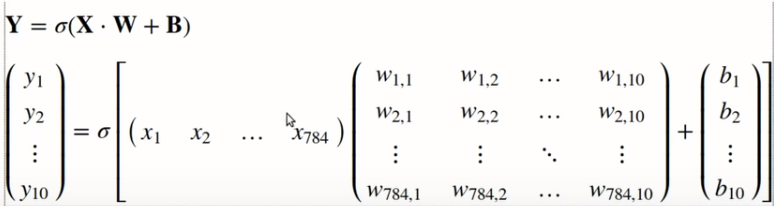

Keep in mind that the cost function for softmax is 
$$
cost=\sum -actual*ln(predict)
$$

In [116]:
#set up the hyper parameters for our model. 
nb_classes=10
W=tf.Variable(tf.random_normal([784,nb_classes]),dtype=tf.float32,name='Weight')
b=tf.Variable(tf.random.normal([nb_classes]),dtype=tf.float32,name='bias')
variables=[W,b]

def soft_max_fn(X):
  return tf.nn.softmax(tf.matmul(X,W)+b)
                                                    
#since the numbers of outcomes are more than 1, we should use a  softmax for multiple classification
def cost_fn(X,y):
  pred=soft_max_fn(X)
  cost=-tf.reduce_mean(tf.reduce_sum(y*tf.math.log(pred),axis=1))
  return cost


def prediction(X,y):
  pred=tf.argmax(soft_max_fn(X),axis=1)
  correct_prediciton=tf.equal(pred,tf.argmax(y,axis=1))
  #to convert boolean value into flaot 32. That is,1 is for True or 0 for False
  accuracy= tf.reduce_mean(tf.cast(correct_prediciton,tf.float32))*100
  return accuracy

def grad_fn(X,y):
  with tf.GradientTape() as tape:
    loss=cost_fn(X,y)
    grads=tape.gradient(loss,variables)
    return grads

def fit(X,y,epoch=1000,verbose=100):
  optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.1)
  for i in range(epoch):
    grads=grad_fn(X,y)
    optimizer.apply_gradients(zip(grads,variables))
    if(i==0)|((i+1)%verbose==0):
      acc=prediction(X,y).numpy()
      loss=cost_fn(X,y).numpy()
      print(f"steps:{i+1} loss:{loss}, Accuracy:{acc}")

fit(x_train,y_train)
a=prediction(x_test,y_test)
print(f'test_accuracy:{a.numpy()}')

  


steps:1 loss:14.923871040344238, Accuracy:9.700000762939453
steps:100 loss:3.934520721435547, Accuracy:45.18666458129883
steps:200 loss:2.4939956665039062, Accuracy:61.3849983215332
steps:300 loss:1.9570783376693726, Accuracy:68.18500518798828
steps:400 loss:1.6660442352294922, Accuracy:72.05999755859375
steps:500 loss:1.4797255992889404, Accuracy:74.55833435058594
steps:600 loss:1.3484177589416504, Accuracy:76.36833190917969
steps:700 loss:1.2498507499694824, Accuracy:77.76166534423828
steps:800 loss:1.1725125312805176, Accuracy:78.9183349609375
steps:900 loss:1.1097828149795532, Accuracy:79.79833221435547
steps:1000 loss:1.0575934648513794, Accuracy:80.5566635131836
test_accuracy:81.2300033569336
